In [3]:
import sys
import os

sys.path.insert(0,'../..')
sys.path.insert(0,'../../py')
import parameters
import utilities
import spectrogram_utilities
import output_utilities
import spectrogram_output_visualiser

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
from scipy import signal
from sklearn import preprocessing

In [4]:
# matplotlib.get_backend()
%matplotlib inline

In [5]:
awd_event = 1
site = parameters.sites[0]

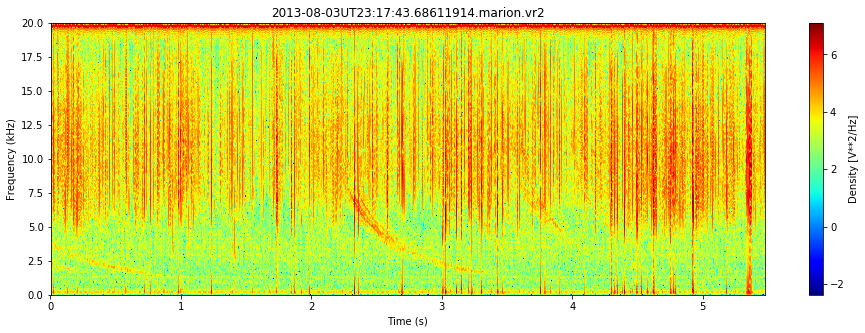

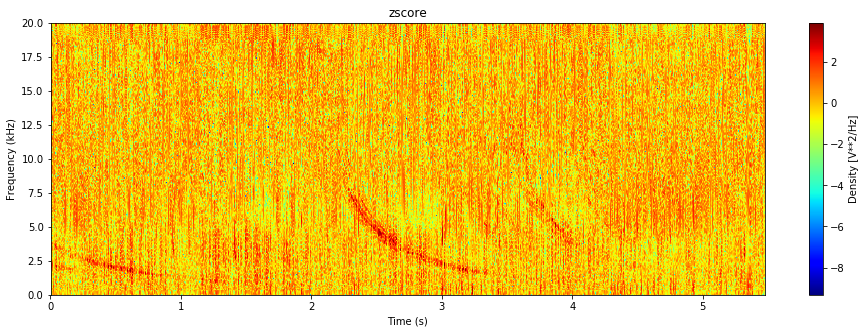

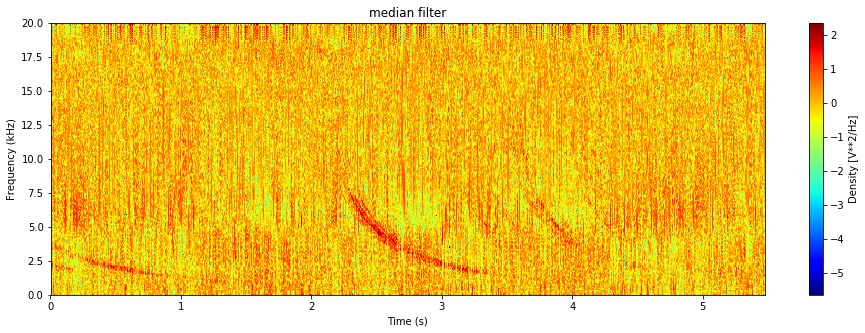

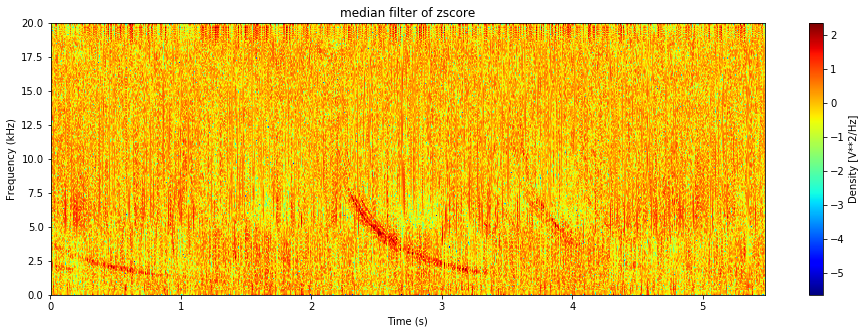

In [53]:
# Select random file
file = utilities.random_file(awd_event, site)
# file = '2013-10-20UT22:43:27.62419422.marion.vr2'
# file = '2013-05-28UT14:08:19.75372164.marion.vr2'
# file = '2013-07-29UT14:22:21.36931914.marion.vr2'
# file = '2013-05-28UT14:08:19.75372164.marion.vr2'
indices, times, frequencies, spectrogram = spectrogram_output_visualiser.spectrogram_and_output(awd_event, site, file, output=False, verbose=False, zscore=False)

fig = plt.figure(figsize=(16,5))
img = plt.pcolormesh(times,frequencies/1000,spectrogram, cmap='jet')
fig.colorbar(mappable=img, label='Density [V**2/Hz]')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.title(file)
plt.show()

indices, times, frequencies, _spectrogram = spectrogram_output_visualiser.spectrogram_and_output(awd_event, site, file, output=False, verbose=False, zscore=True)

fig = plt.figure(figsize=(16,5))
img = plt.pcolormesh(times,frequencies/1000,_spectrogram, cmap='jet')
fig.colorbar(mappable=img, label='Density [V**2/Hz]')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.title('zscore')
plt.show()

_spectrogram = signal.detrend(spectrogram, axis=0)
_spectrogram = signal.detrend(_spectrogram, axis=1)
fig = plt.figure(figsize=(16,5))
img = plt.pcolormesh(times,frequencies/1000,_spectrogram, cmap='jet')
fig.colorbar(mappable=img, label='Density [V**2/Hz]')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.title('median filter')
plt.show()

indices, times, frequencies, _spectrogram = spectrogram_output_visualiser.spectrogram_and_output(awd_event, site, file, output=False, verbose=False, zscore=True)
# _spectrogram = signal.medfilt(_spectrogram, kernel_size=3)
_spectrogram = signal.detrend(spectrogram, axis=0)
_spectrogram = signal.detrend(_spectrogram, axis=1)
fig = plt.figure(figsize=(16,5))
img = plt.pcolormesh(times,frequencies/1000,_spectrogram, cmap='jet')
fig.colorbar(mappable=img, label='Density [V**2/Hz]')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.title('median filter of zscore')
plt.show()

# fig = plt.figure(figsize=(16,5))
# img = plt.pcolormesh(times,frequencies/1000,preprocessing.normalize(_spectrogram), cmap='jet')
# fig.colorbar(mappable=img, label='Density [V**2/Hz]')
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency (kHz)')
# plt.title('normalised median fileter of zscore')
# plt.show()